## 1. Multi-Class Classification:
For the multiclass classification problem, there were six different datasets. Some of the datasets contain missing values. For example, TrainData1, TestData1 and TrainData3 contain some missing values (1.00000000000000e+99). Therefore, the first approach needs to handle the missing values for selecting the features. Then compare the accuracy on train dataset to find out which classifier gives best result for each dataset with cross validation to verify the accuracy based on test dataset.
<center><div style='width:50%; height:50%'><img src='../images/Q1_table.jpeg'></div></center>

Hint:
* Missing Value Estimation
    - (KNN method for imputation of the missing values)
* Dimensionality Reduction
* Use Several Classifiers/ Ensemble Method
    - Logistic Regression (with different c values)
    - Random Forest (with different estimator values)
    - SVM (with different kernels)
    - KNN (with k = 1,2,5,10,20)
    - K (3,5,10) Fold Cross Validation
* Performance Comparison
    - Classification Accuracy, Precision, Recall, Sensitivity, Specificity
    - AUC, ROC Curve

In [486]:
import warnings
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import offsetbox

import seaborn as sns
import statistics as stat
from sklearn.preprocessing import *
# Modeling settings
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Testing & Validation packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

# SVM
from sklearn.svm import *

# KNN
from sklearn.neighbors import KNeighborsClassifier
from impyute.imputation.cs import fast_knn

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydotplus import *
# SVM
from sklearn.svm import SVC

In [353]:
def optimizeK(X_train, y_train, X_test, y_test):
    neighbors = np.arange(1,20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        train_accuracy[i] = knn.score(X_train, y_train)

        test_accuracy[i] = knn.score(X_test, y_test2)
        
    return neighbors, test_accuracy, train_accuracy

In [361]:
def plotK(neighbors, test_accuracy, train_accuracy):
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training Accuracy')
        plt.legend()
        plt.xlabel('Number of Neighbors')
        plt.xticks(np.arange(0, neighbors[-1], step=1))
        plt.ylabel('Accuracy')
        plt.title('KNN Varying Number of Neighbors')
        plt.show()

In [317]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None)
X_train4 = pd.read_csv('../data/1/TrainData4.txt', delimiter='\s+', header=None)

In [318]:
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)
y_train4 = pd.read_csv('../data/1/TrainLabel4.txt', delimiter='\n', header=None)

In [319]:
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)
X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter=',',   header=None)
X_test4 = pd.read_csv('../data/1/TestData4.txt', delimiter='\s+', header=None)

In [320]:
X_training = [X_train2, X_train3, X_train4]
y_training = [y_train2, y_train3, y_train4]
X_testing = [X_test2, X_test3, X_test4]

In [321]:
for i,x in enumerate(X_training):
    print(f'X_TrainData{i+1} Shape: {x.shape}')

X_TrainData1 Shape: (100, 9182)
X_TrainData2 Shape: (6300, 13)
X_TrainData3 Shape: (2547, 112)


In [322]:
for i,y in enumerate(y_training):
    print(f'y_TrainData{i+1} Shape: {y.shape}')

y_TrainData1 Shape: (100, 1)
y_TrainData2 Shape: (6300, 1)
y_TrainData3 Shape: (2547, 1)


In [323]:
for j,y in enumerate(X_testing):
    print(f'TestData{j+1} Shape: {y.shape}')

TestData1 Shape: (74, 9182)
TestData2 Shape: (2693, 13)
TestData3 Shape: (1092, 112)


# _Dataset 2_

### PCA for DS2

In [324]:
X_train2.shape

(100, 9182)

In [325]:
y_train2.shape

(100, 1)

In [326]:
X_test2.shape

(74, 9182)

In [327]:
xTrain2PCA = PCA(n_components=74)
X_train2_pca = xTrain2PCA.fit_transform(X_train2)

In [330]:
# 100 principle components can explain 99% of the data
X_train2_pca_var = xTrain2PCA.fit(X_train2)
print(sum(X_train2_pca_var.explained_variance_ratio_))
print(X_train2_pca.shape)

0.9286974232977014
(100, 74)


In [332]:
# 74 principle components can explain 99% of the data
xTest2PCA = PCA(n_components=74)
X_test2_pca = xTest2PCA.fit_transform(X_test2)

In [333]:
X_test2_pca_var = X_test_pca.fit(X_test2)
print(sum(X_test2_pca_var.explained_variance_ratio_))
print(X_test2_pca.shape)

1.0
(74, 74)


In [334]:
X_train2_components = pd.DataFrame(X_train2_pca)
X_train2_components.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-26.398235,-5.530790,13.539575,-3.261458,0.091593,1.422977,-2.226115,-2.378388,-0.173422,-0.228883,...,1.769892,0.671511,-2.160776,1.689032,0.728445,0.602022,0.362428,0.779430,1.843577,-0.588443
1,-23.599232,-8.284541,14.064258,-1.687288,1.326068,4.722250,-1.644228,-2.860102,-2.502481,1.829479,...,1.994133,-0.975750,0.338445,0.375570,-0.393178,-0.078496,-3.499171,-0.915880,-0.367878,0.348183
2,-15.135961,-7.972685,16.700652,-5.440528,3.488561,5.183083,-1.611926,-1.053969,0.417413,-1.267299,...,-0.567445,0.137374,0.676257,-0.084157,0.571766,-0.888931,-1.768764,0.340637,-0.834486,1.213872
3,-18.103189,-5.975542,16.094550,-3.843834,2.276550,3.666257,-2.545413,-1.866804,-1.184550,-0.838655,...,-1.050938,1.206510,0.031595,-2.158518,0.128975,-0.690305,3.674835,2.509785,1.697250,2.011984
4,-22.822826,-6.600625,9.438649,-4.610976,-1.249008,3.858574,-1.569874,-4.665994,0.619715,-1.134129,...,-2.053682,3.430702,-0.905143,-1.811452,-0.175091,-0.808325,1.466094,-0.277196,-1.360354,-0.758761
5,-18.592907,-7.772098,10.935273,-3.627113,0.250209,6.492129,0.789130,-3.185537,1.905848,-1.889869,...,-2.149577,-0.321251,3.224864,-3.330149,-1.412189,0.799637,-1.481153,-0.524755,-0.745604,-2.293051
6,-18.252124,-7.872842,10.589439,-4.421726,3.189024,3.490889,-0.284536,-0.683610,0.542131,1.134951,...,-2.761245,0.730524,-1.099940,1.843039,0.669872,0.912045,1.528847,1.252535,0.220031,-0.967213
7,-17.599638,-10.100549,13.873925,-4.178522,2.441275,5.263620,-0.336822,-0.244288,1.713685,0.964039,...,0.385185,-1.533010,-2.484106,1.782622,-0.649335,0.930743,-1.903577,-3.343691,1.190831,-0.850214
8,-24.282513,-6.514783,12.622519,-2.874138,1.605756,3.104980,-1.459507,-1.696867,-1.219803,0.894437,...,-0.181104,1.500213,-1.173017,2.951247,1.730101,0.021183,0.888744,1.670452,-0.832912,0.549460
9,-19.073462,-6.858019,16.699828,-2.936944,2.511107,5.214196,-2.587623,-1.449506,3.504322,0.991001,...,2.901244,-3.257265,3.312841,-1.064244,-0.898266,-0.367167,1.397126,-1.290269,-0.624605,0.677280


In [335]:
X_test2_components = pd.DataFrame(X_test2_pca)
X_test2_components.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-10.398547,2.226483,-0.658507,0.728649,-3.004981,-1.459457,11.538866,0.131821,-3.003679,8.534441,...,-0.018208,-0.591814,-0.158086,0.552216,0.711834,-0.246909,0.286311,0.049778,2.417375e-14,1.751869e-19
1,-9.148466,-1.053395,2.558946,6.409951,-1.139522,14.874160,12.840859,-1.954532,-1.438027,-3.864114,...,1.078071,2.187830,0.146664,-0.497945,0.557118,1.027339,-0.469129,-0.694673,2.417375e-14,1.751869e-19
2,-9.518250,8.940772,-7.869489,6.712257,5.851278,-4.459876,1.175211,9.256822,-2.179910,-2.784083,...,-0.775006,0.586132,0.017582,-0.994174,-0.862647,0.138018,-0.702943,-0.308250,2.417375e-14,1.751869e-19
3,-3.430898,4.484006,8.917650,-5.211835,3.051420,-7.458819,8.400516,-2.596811,-6.939696,2.710260,...,0.501017,-0.003214,-0.102685,0.572909,-0.200991,-0.957525,-0.212132,-0.013422,2.417375e-14,1.751869e-19
4,-1.953057,-10.889354,-4.247043,-4.255280,8.396341,-4.124702,1.326687,3.342917,-1.886089,-0.442950,...,-4.006541,1.502856,0.414789,0.816762,0.849764,-0.002994,-0.217039,0.212119,2.417375e-14,1.751869e-19
5,-9.114472,30.661399,-16.602591,-13.681703,2.121322,-3.888211,14.515758,-0.522400,15.452621,2.824357,...,-0.026268,0.064399,0.062601,0.329610,-0.000407,-0.151348,0.321557,0.058960,2.417375e-14,1.751869e-19
6,-4.265600,-12.394460,-0.936758,-0.831384,3.428773,2.155973,1.140246,-5.377360,1.021447,9.118232,...,-0.159312,1.469154,-1.448169,-1.886565,1.829980,-0.307286,-0.105608,-0.261595,2.417375e-14,1.751869e-19
7,-4.660430,-10.362650,-4.043087,-3.373387,3.434039,2.838975,-0.694445,4.525555,1.816828,2.884826,...,-1.118630,-1.292512,2.199333,0.609899,-2.353852,1.178842,-0.321623,0.223460,2.417375e-14,1.751869e-19
8,-3.686264,2.464987,-0.372169,-5.940278,-0.656506,-5.937303,1.116711,3.091034,-2.422265,-0.681678,...,-0.262838,-0.473030,-0.149251,0.003186,-0.580069,0.571946,0.236134,-0.023115,2.417375e-14,1.751869e-19
9,-21.698063,33.851093,-19.187314,-7.433600,-4.502362,2.815571,-4.050009,-3.314655,-14.344385,9.912675,...,0.587508,0.378001,-0.159303,0.175027,0.189138,-0.023102,0.254395,-0.091289,2.417375e-14,1.751869e-19


In [336]:
X_train2_components.shape

(100, 74)

In [337]:
y_train2.shape

(100, 1)

In [338]:
X_test2_components.shape

(74, 74)

### KNN for DS2

In [452]:
# KNN to obtain y_test1 values

knn = KNeighborsClassifier(n_neighbors=5)

knn = knn.fit(X_train2_components, y_train2)
y_test2_pred = knn.predict(X_test2_components)
print(y_test2_pred)

[ 9  1  6  4  6  5  6  6  8 11  3  1  3  3  1  4  6  4  6  1  1  8  1  1
  1  1  1  1  1  1  4  1  6  1  4  4  6  8  6  2  6  6  6  8  6  9  4  4
  4  4  4  4  4  4  4  4  4  4  4  3  6  6  6  6  6  8  6  6  6  6  6  8
  2  6]


In [453]:
y_test2 = y_test2_pred

In [454]:
y_test2

array([ 9,  1,  6,  4,  6,  5,  6,  6,  8, 11,  3,  1,  3,  3,  1,  4,  6,
        4,  6,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  6,  1,
        4,  4,  6,  8,  6,  2,  6,  6,  6,  8,  6,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  6,  6,  6,  6,  6,  8,  6,  6,
        6,  6,  6,  8,  2,  6])

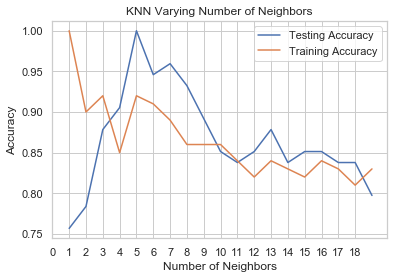

In [455]:
n, test_acc, train_acc = optimizeK(X_train2_components, y_train2, X_test2_components, y_test2)
plotK(n, test_acc, train_acc)

In [456]:
n_neighbors=3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train2_components, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [457]:
knn.score(X_test2_components, y_test2)

0.8783783783783784

In [458]:
knn_y_pred = knn.predict(X_test2_components)
knn_cm = confusion_matrix(y_test2, knn_y_pred)
print(knn_cm)

[[13  0  0  1  0  0  0  0  1]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 1  0  0 17  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0 21  0  2  0]
 [ 0  1  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]


In [459]:
pd.crosstab(y_test2, knn_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,13,0,0,1,0,0,0,0,1,15
2,0,2,0,0,0,0,0,0,0,2
3,0,0,4,0,0,0,0,0,0,4
4,1,0,0,17,0,1,0,0,0,19
5,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,21,0,2,0,24
8,0,1,0,0,0,0,5,0,0,6
9,0,1,0,0,0,0,0,1,0,2
11,0,0,0,0,0,0,0,0,1,1


In [460]:
knn_cr = classification_report(y_test2, knn_y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       0.40      1.00      0.57         2
           3       1.00      1.00      1.00         4
           4       0.94      0.89      0.92        19
           5       1.00      1.00      1.00         1
           6       0.95      0.88      0.91        24
           8       1.00      0.83      0.91         6
           9       0.33      0.50      0.40         2
          11       0.50      1.00      0.67         1

    accuracy                           0.88        74
   macro avg       0.78      0.89      0.81        74
weighted avg       0.92      0.88      0.89        74



In [478]:
knn_y_pred_proba = knn.predict_proba(X_test2_components)[:,1]
knn_y_pred_proba[0]

0.3333333333333333

In [481]:
# fpr, tpr, thresholds = roc_curve(y_test2, knn_y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'KNN (n_neighbors={n_neighbors}) ROC Curve')
plt.show()

In [490]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=0))

# generate y_score
y_score = classifier.fit(X_train2_components, y_train2).decision_function(X_test2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

ValueError: X.shape[1] = 9182 should be equal to 74, the number of features at training time

### Logistic Regression for DS2

In [405]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train2_components, y_train2)

lr_y_pred = lr.predict(X_test2_components)

In [424]:
lr_cm = confusion_matrix(y_test2, lr_y_pred)
print(f'Logistic Regression Confusion Matrix\n\n{lr_cm}')

Logistic Regression Confusion Matrix

[[10  0  0  0  1  0  4  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0  1  0  0  0]
 [ 2  0  0  6  2  0  7  0  2  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 1  1  1  0  0 12  4  1  1  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


In [435]:
print(' Logistic Regression Confusion Matrix\n ______________________________________',)
pd.crosstab(y_test2, knn_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

 Logistic Regression Confusion Matrix
 ______________________________________


Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,13,0,0,1,0,0,0,0,1,15
2,0,2,0,0,0,0,0,0,0,2
3,0,0,4,0,0,0,0,0,0,4
4,1,0,0,17,0,1,0,0,0,19
5,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,21,0,2,0,24
8,0,1,0,0,0,0,5,0,0,6
9,0,1,0,0,0,0,0,1,0,2
11,0,0,0,0,0,0,0,0,1,1


In [436]:
lr_cr = classification_report(y_test2, lr_y_pred)
print(f'             Logistic Regression Classification Report\n\n{lr_cr}')

             Logistic Regression Classification Report

              precision    recall  f1-score   support

           1       0.77      0.67      0.71        15
           2       0.33      0.50      0.40         2
           3       0.75      0.75      0.75         4
           4       1.00      0.32      0.48        19
           5       0.25      1.00      0.40         1
           6       1.00      0.50      0.67        24
           7       0.00      0.00      0.00         0
           8       0.67      0.67      0.67         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0
          11       0.25      1.00      0.40         1

    accuracy                           0.51        74
   macro avg       0.46      0.49      0.41        74
weighted avg       0.85      0.51      0.60        74



In [437]:
print('LR Accuracy:', accuracy_score(y_test2, lr_y_pred))

NameError: name 'accuracy_score' is not defined

# Dataset 3

In [68]:
# X_train3
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.000000e+99
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.000000e+00
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.000000e+00
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00


In [69]:
n = X_train3[12][0]

for i in X_train3.keys():
    X_train3[i] = X_train3[i].replace(n, np.nan)

In [70]:
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,NaN
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0


In [ ]:
X_train3_clean = fast_knn(X_train1.values, k=100)

In [ ]:
# # Logistic Regression
# log_reg = LogisticRegression(solver='lbfgs')
# log_reg.fit(X_train1, y_train1)